In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [17]:
ath_data = pd.read_csv('athlete_events.csv')
noc_data = pd.read_csv('noc_regions.csv')

In [18]:
ath_data.shape

(271116, 15)

In [19]:
ath_data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [20]:
noc_data.shape

(230, 3)

In [21]:
noc_data.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [22]:
ath_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [23]:
ath_data.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


# Inferences from descriptive statistics
 - std is very high for the range given<br>
     -- Look for right trend why it is so?
 - min and max looks unreal for age<br>
     -- potential outlier
 - min weigth looks unreal

# Merging the datasets

In [24]:
data = pd.merge(ath_data, noc_data, on = 'NOC', how = 'left')

In [25]:
data.shape

(271116, 17)

In [26]:
data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


# Analysing Medal variable
1. Distribution of age with gold medal

<AxesSubplot:xlabel='Medal', ylabel='count'>

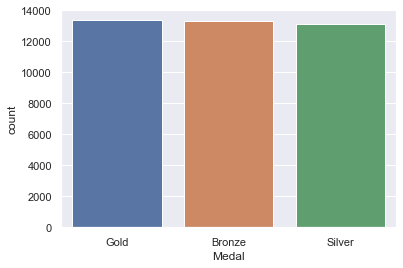

In [30]:
sns.countplot(data = data, x = 'Medal')

In [31]:
data['Medal'].value_counts()

Gold      13372
Bronze    13295
Silver    13116
Name: Medal, dtype: int64

In [32]:
golddf = data[data['Medal'] == 'Gold']
golddf

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold,Finland,NaN
44,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold,Finland,NaN
48,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold,Finland,NaN
60,20,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,1992 Winter,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Super G,Gold,Norway,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270981,135503,Zurab Zviadauri,M,23.0,182.0,90.0,Georgia,GEO,2004 Summer,2004,Summer,Athina,Judo,Judo Men's Middleweight,Gold,Georgia,NaN
271009,135520,Julia Zwehl,F,28.0,167.0,60.0,Germany,GER,2004 Summer,2004,Summer,Athina,Hockey,Hockey Women's Hockey,Gold,Germany,NaN
271016,135523,"Ronald Ferdinand ""Ron"" Zwerver",M,29.0,200.0,93.0,Netherlands,NED,1996 Summer,1996,Summer,Atlanta,Volleyball,Volleyball Men's Volleyball,Gold,Netherlands,NaN
271049,135545,Henk Jan Zwolle,M,31.0,197.0,93.0,Netherlands,NED,1996 Summer,1996,Summer,Atlanta,Rowing,Rowing Men's Coxed Eights,Gold,Netherlands,NaN


In [33]:
golddf.isnull().sum()

ID            0
Name          0
Sex           0
Age         148
Height     2833
Weight     3118
Team          0
NOC           0
Games         0
Year          0
Season        0
City          0
Sport         0
Event         0
Medal         0
region        1
notes     13201
dtype: int64

In [34]:
golddf = golddf[np.isfinite(golddf['Age'])]

In [36]:
golddf.isnull().sum()

ID            0
Name          0
Sex           0
Age           0
Height     2692
Weight     2976
Team          0
NOC           0
Games         0
Year          0
Season        0
City          0
Sport         0
Event         0
Medal         0
region        1
notes     13053
dtype: int64

Text(0.5, 1.0, 'Age distribution of gold medal')

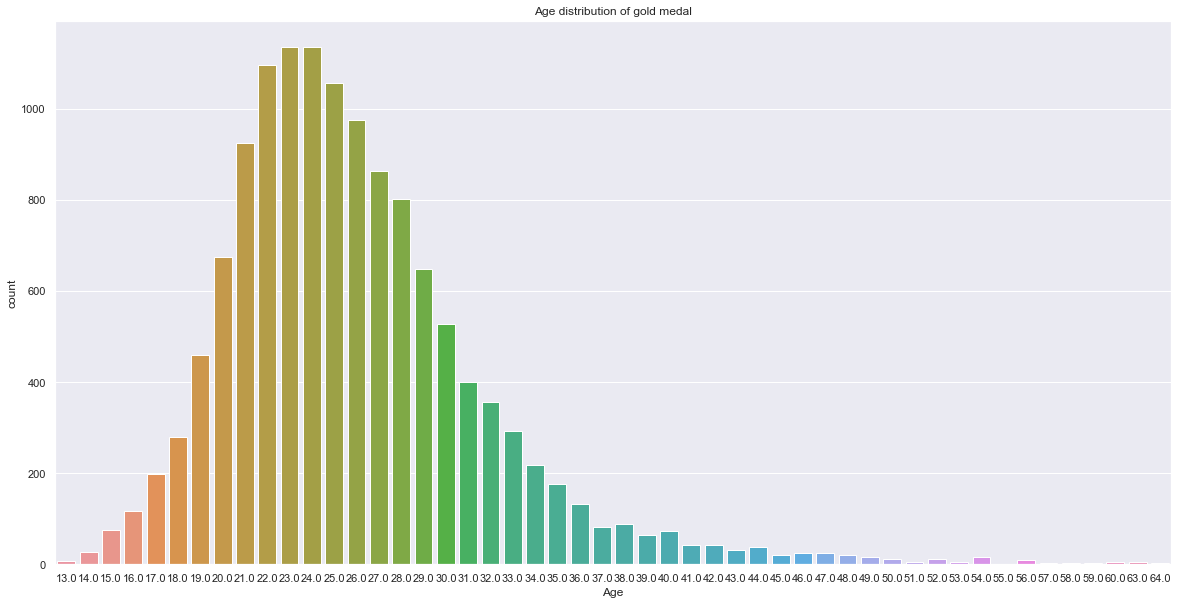

In [41]:
# plotting the distribution
plt.figure(figsize = (20,10))
plt.tight_layout()
sns.countplot(data = golddf, x = 'Age')
plt.title('Age distribution of gold medal')

<AxesSubplot:xlabel='Sport', ylabel='count'>

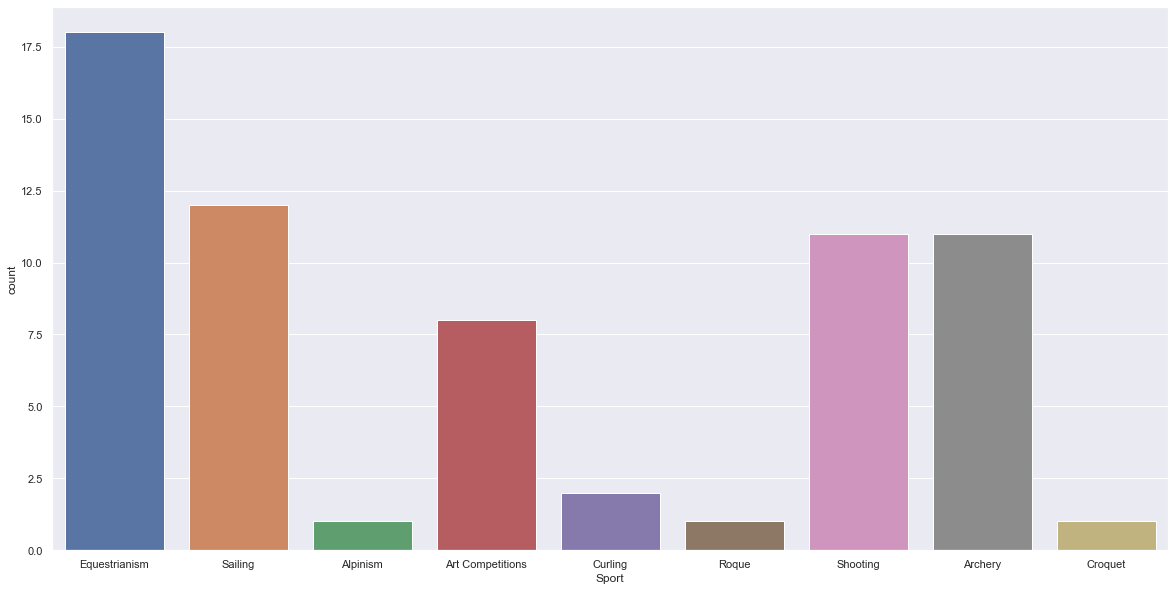

In [44]:
plt.figure(figsize = (20,10))
plt.tight_layout()
sns.countplot(data = golddf, x = golddf[golddf['Age'] > 50]['Sport'])

# Which gender has more medals?

In [47]:
golddf.groupby('Sex')['Medal'].count()

Sex
F    3744
M    9480
Name: Medal, dtype: int64

<AxesSubplot:xlabel='Sex'>

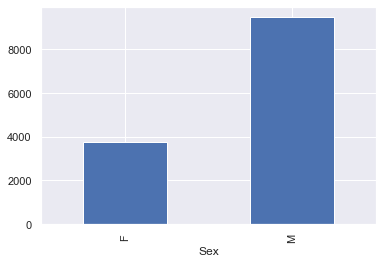

In [48]:
golddf.groupby('Sex')['Medal'].count().plot(kind = 'bar')

# Which team has more gold medals?

In [55]:
golddf.groupby('Team')['Medal'].count().sort_values(ascending = False)

# But as in golddf dataframe we have data of only gold medals, so we can directly do -
# golddf['Team'].value_counts()

Team
United States                2472
Soviet Union                 1058
Germany                       676
Italy                         534
Great Britain                 515
                             ... 
Jordan                          1
Bahrain                         1
Milwaukee Athletic Club-1       1
Peru                            1
Seawanhaka Boat Club-1          1
Name: Medal, Length: 236, dtype: int64

# Game and age analysis

In [61]:
data['Sport'].nunique()

66

<AxesSubplot:xlabel='Sport'>

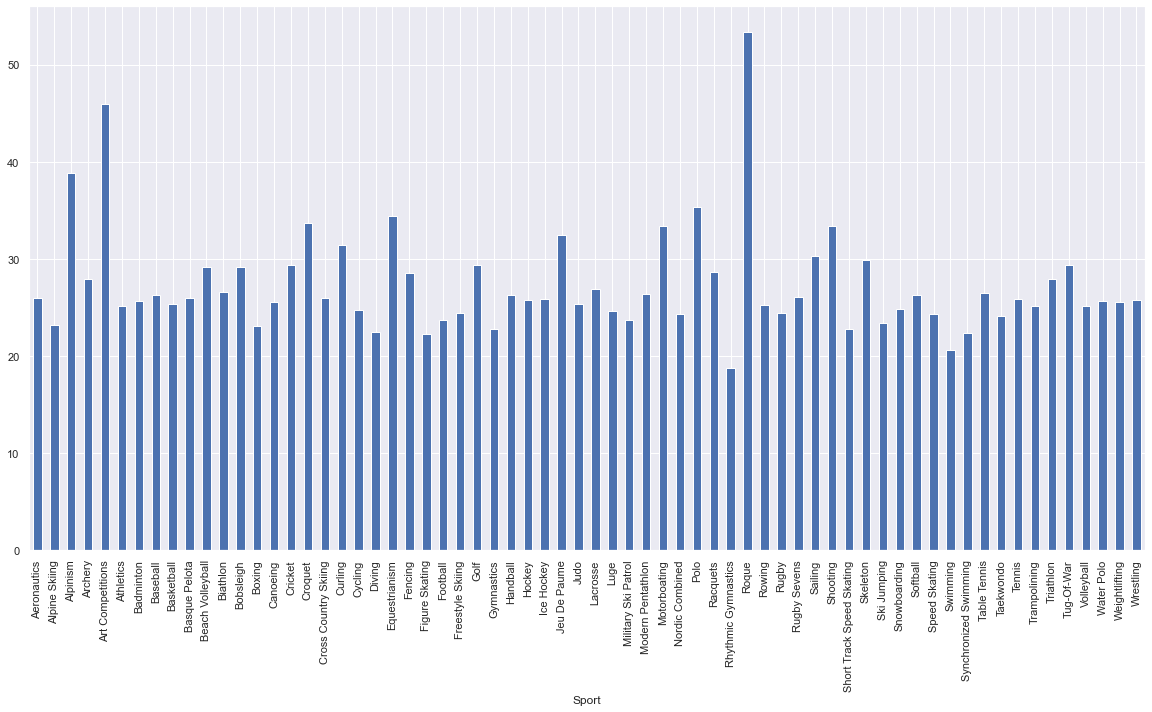

In [60]:
plt.figure(figsize = (20,10))
data.groupby('Sport')['Age'].mean().plot(kind = 'bar')

# Player who has won most gold medals

In [63]:
# golddf.groupby('Name')['ID'].count().sort_values(ascending = False)
golddf['Name'].value_counts()

Michael Fred Phelps, II                    23
Raymond Clarence "Ray" Ewry                10
Paavo Johannes Nurmi                        9
Larysa Semenivna Latynina (Diriy-)          9
Frederick Carlton "Carl" Lewis              9
                                           ..
Vadym Markovych Huttsait                    1
Svenja Anette Huth                          1
Francis Valentine Joseph "Frank" Hussey     1
Zakir Hussain                               1
Galina Ivanovna Zybina (-Fyodorova)         1
Name: Name, Length: 10281, dtype: int64

# In what kind of season most olympics are held?

In [64]:
data['Season'].value_counts()

Summer    222552
Winter     48564
Name: Season, dtype: int64

<AxesSubplot:>

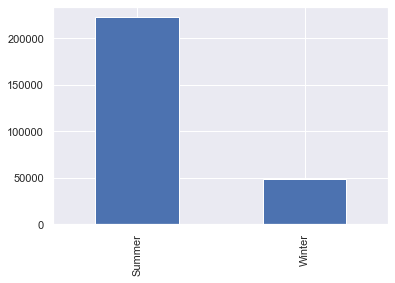

In [65]:
data['Season'].value_counts().plot(kind = 'bar')

# Ideal height and weight for winning gold medal

<AxesSubplot:xlabel='Height', ylabel='Count'>

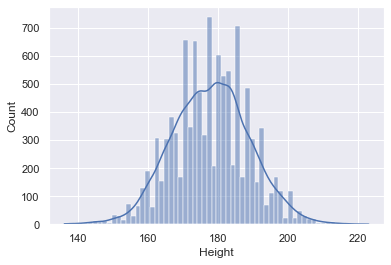

In [68]:
sns.histplot(data = golddf, x = 'Height', kde = True)

<AxesSubplot:xlabel='Weight', ylabel='Count'>

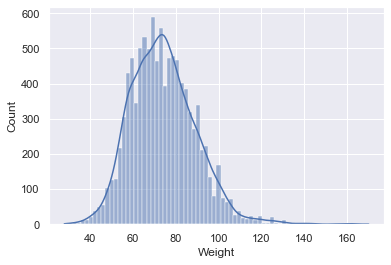

In [69]:
sns.histplot(data = golddf, x = 'Weight', kde = True)